In [3]:
import seaborn as sns
import pickle as pl
from pathlib import Path
import glob
import matplotlib.pyplot as plt

# %matplotlib notebook

OUTPUT_DIR = Path("/work/smt4/thulke/vieweg/SER/Code/sisyphus/output")

sns.set_theme(context="paper", style="whitegrid", palette="deep", font="cm")

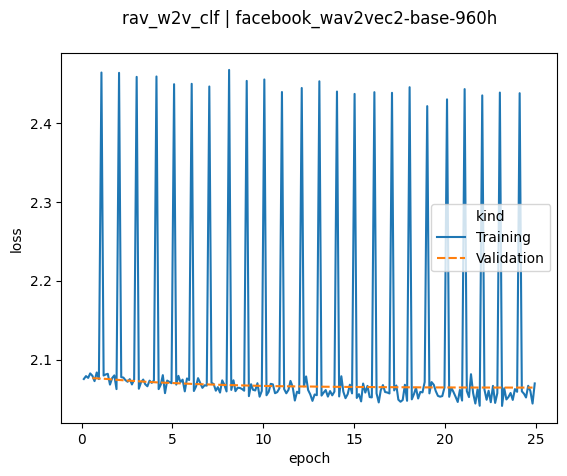

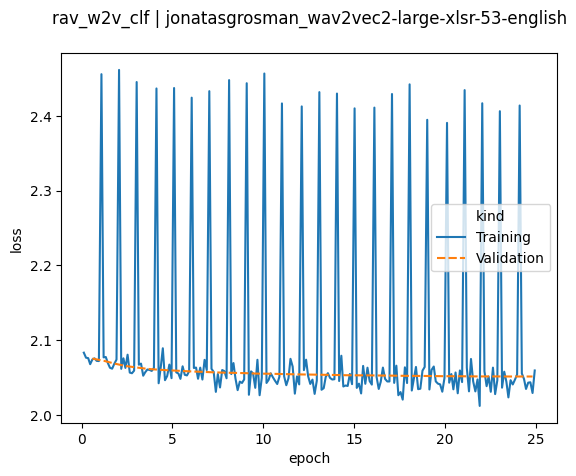

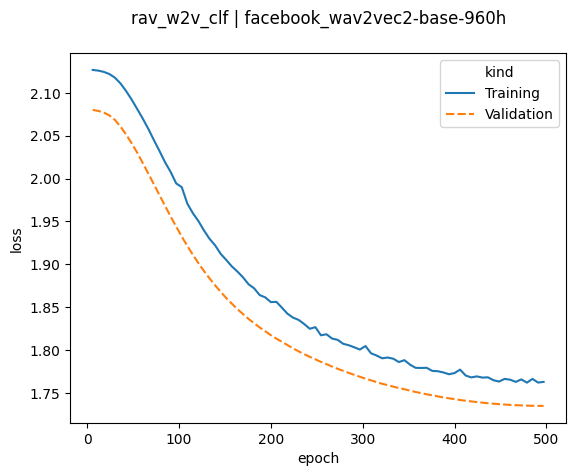

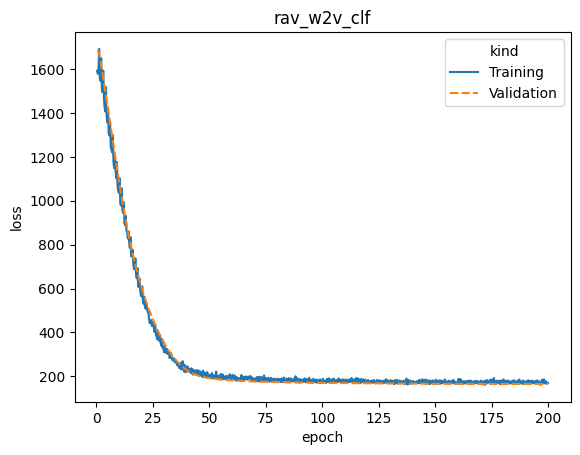

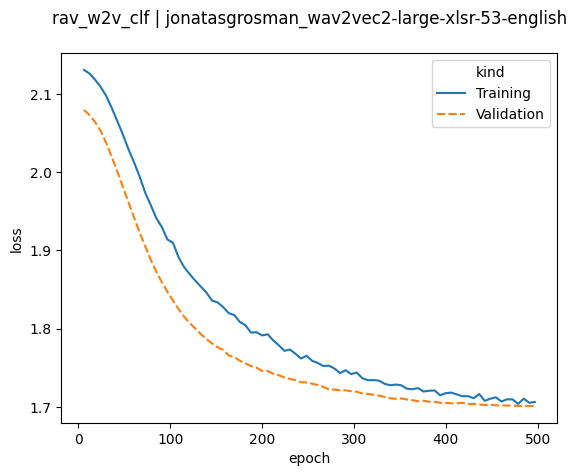

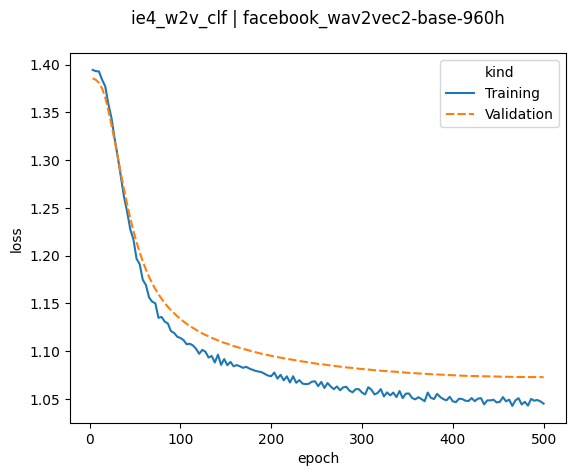

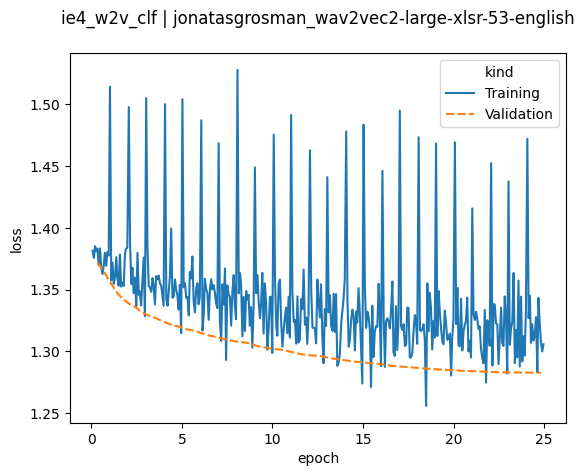

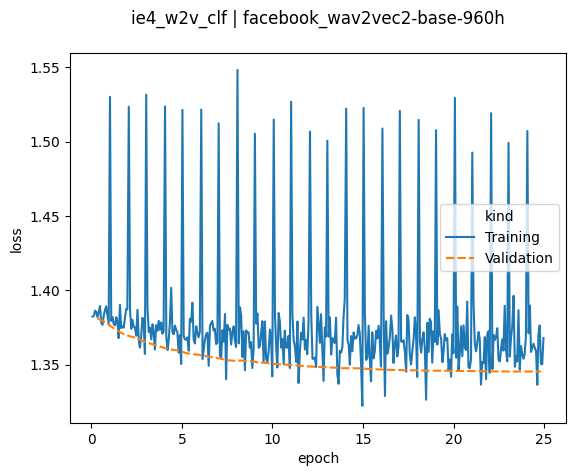

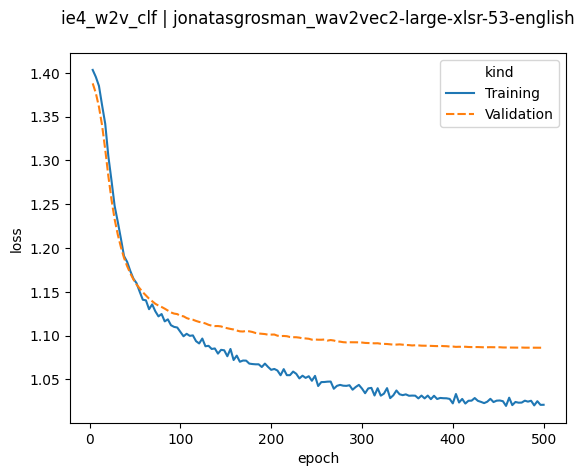

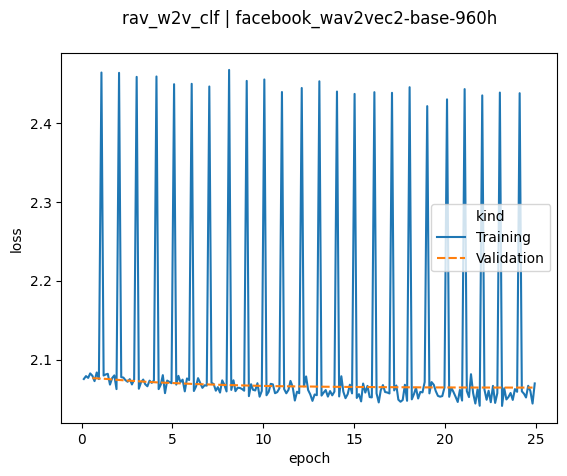

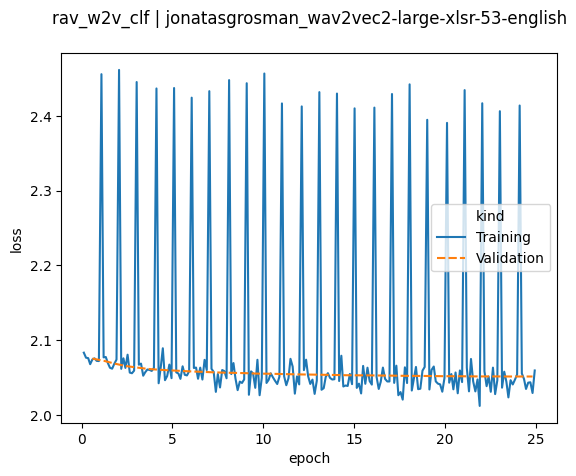

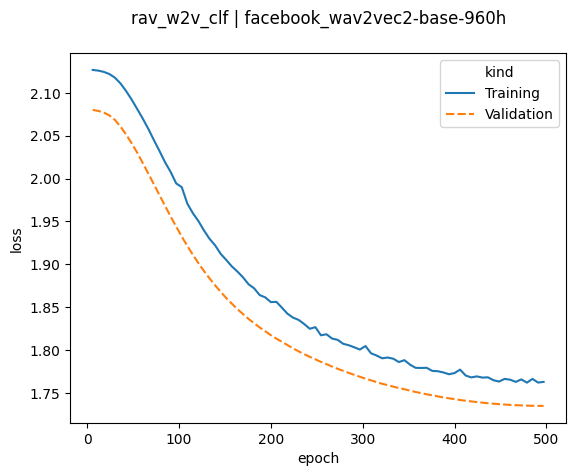

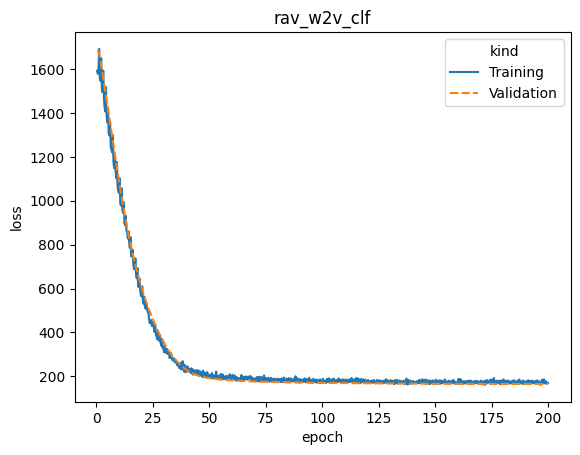

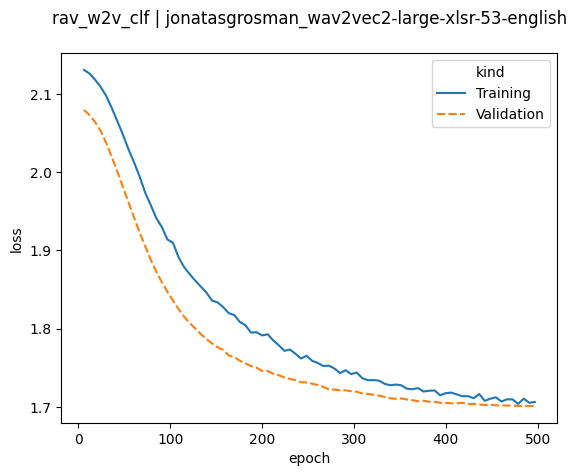

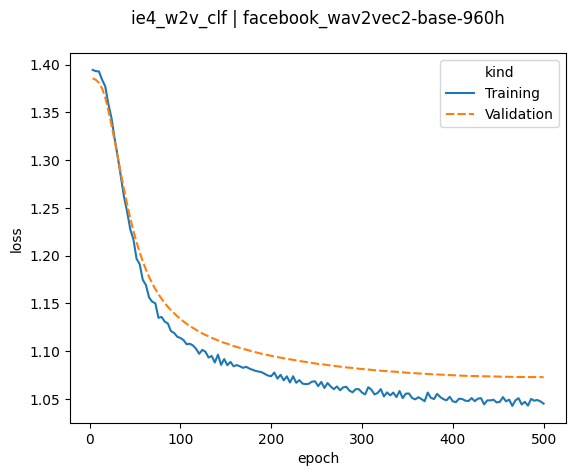

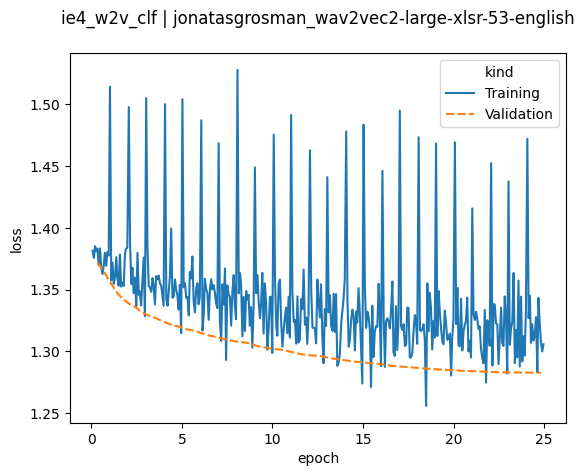

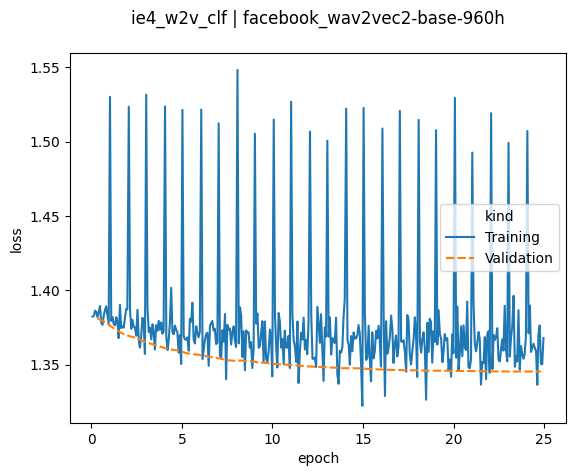

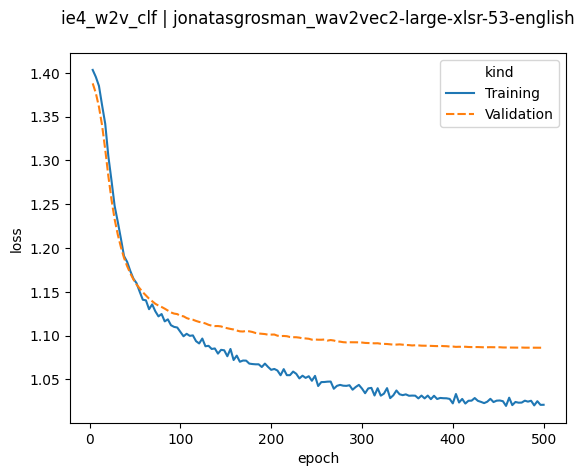

In [4]:
for path in map(Path, glob.glob(f"{OUTPUT_DIR}/**/loss.pkl", recursive=True)):
    with path.open("rb") as file:
        plot = pl.load(file)
        # plt.show()
        # sns.set_theme(context="paper", style="whitegrid", palette="deep", font="cm")

    display(plot)